Here we generated a unique figure that creates a subplot for every chromosome (1 to 7), based on their clustering count (y axis) and differentially methylated cytosine (DMC) pattern.

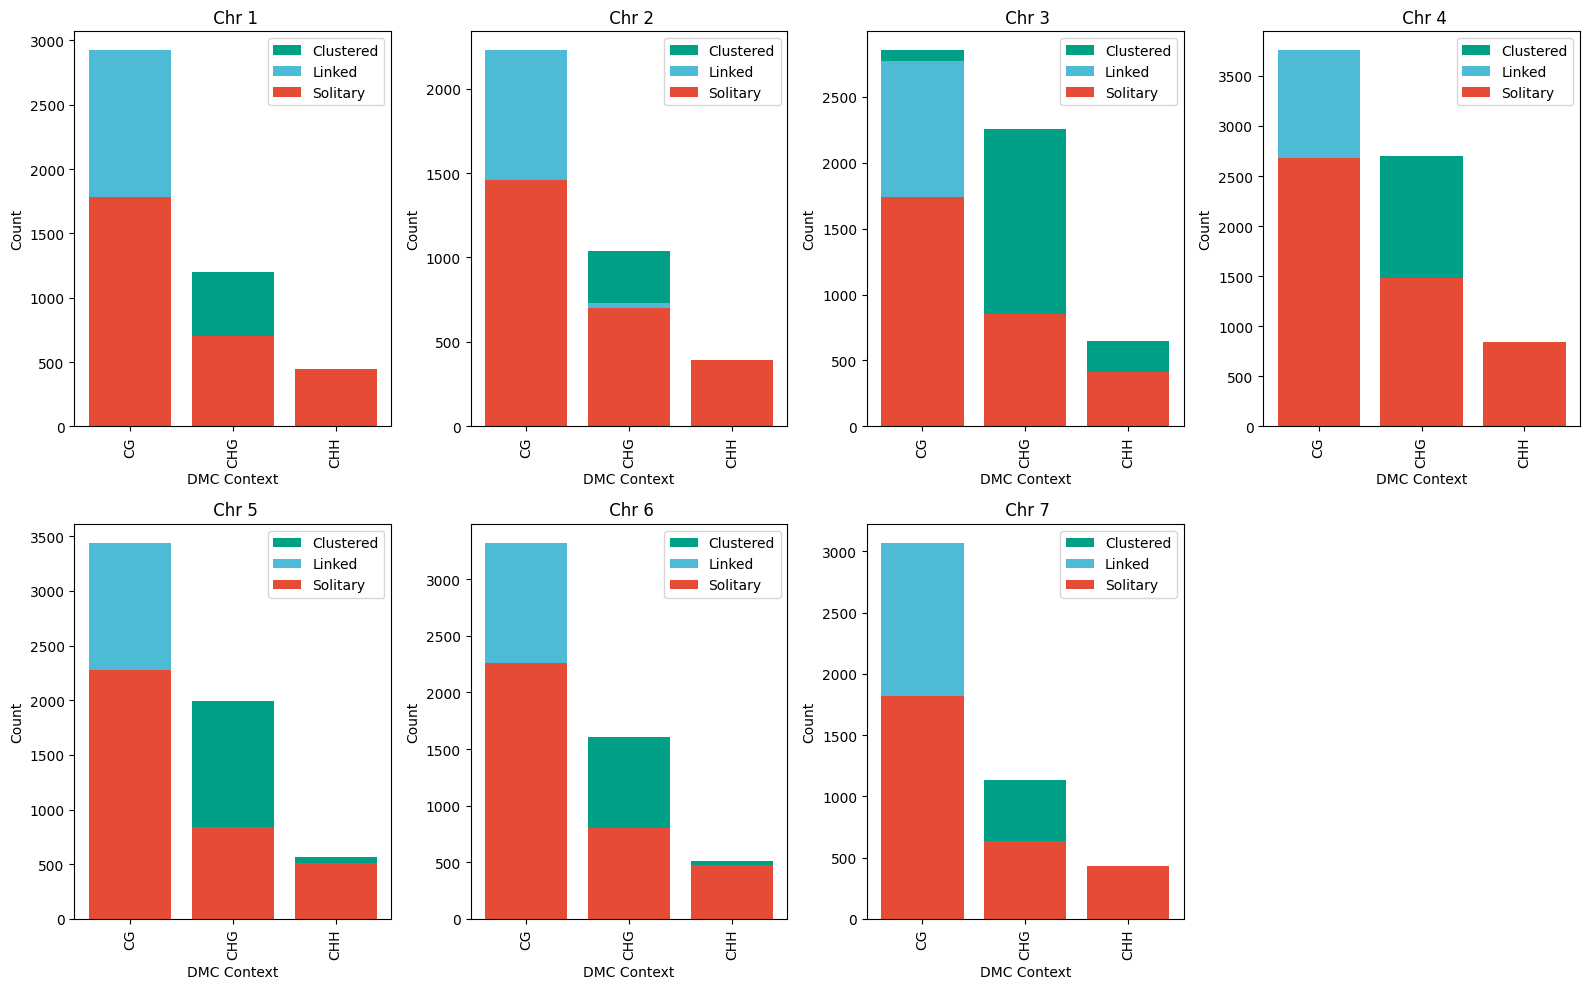

<Figure size 640x480 with 0 Axes>

In [1]:
#Necessary modules loading
import pandas as pd
import matplotlib.pyplot as plt

# We load the paper's Excel file into a DataFrame
file_path = "mec15689-sup-0002-tables1-s7.xlsx"
sheet_name = "Sheet2"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Excluding the rows with NaN values in 'Context' or 'Clustering' columns
df_filtered = df.dropna(subset=['Context', 'Clustering'])

df_filtered = df_filtered[~df_filtered['Chr'].astype(str).str.startswith('0*')] # For some reaosns, there were names starting with 0*, instead of 1 to 7. We excluded them.

# Getting 1 to 7 chr from column.
unique_values = df_filtered['Chr'].unique()

# My favorite colors
custom_palette = ['#00A087', '#4DBBD5', '#E64B35']

# Plotting
plt.figure(figsize=(16, 10))

# Cycling through the colors in the palette as needed
color_index = 0

for i, value in enumerate(unique_values, 1):
    plt.subplot(2, 4, i)
    subset_df = df_filtered[df_filtered['Chr'] == value]
    counts_df = subset_df.groupby(['Context', 'Clustering']).size().unstack(fill_value=0)
    colors = {'Clustered': 0, 'Linked': 1, 'Solitary': 2}  #colors based on the custom palette index
    x_labels = [f"{index}" for index in counts_df.index]
    x_values = range(len(counts_df))
    for col in counts_df.columns:
        plt.bar(x_values, counts_df[col], label=col, color=custom_palette[color_index])
        color_index = (color_index + 1) % len(custom_palette)  # Cycle colors in the palette
    plt.xlabel('DMC Context')
    plt.ylabel('Count')
    plt.title(f' Chr {value}')
    plt.xticks(x_values, x_labels, rotation=90, ha='center')
    plt.legend()

plt.tight_layout()
plt.savefig('assignment_subplot_extra.png', dpi=300)  # Save the combined figure with increased quality
plt.show()

plt.savefig('Supplementary_Extra_Figure.png')